# cGAN using pix2pix - More applications



In [ ]:
import cv2 # opencv
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [ ]:
!pwd

/content


In [ ]:
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!pwd

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408216 sha256=aac13bb92542b8d7cbf3aeeacd6a5fb50c35d4721108abd1c3d33145733b8706
  Stored in directory: /root/.cache/pip/wheels/58/9e/14/30f7cc4dafdd4d602fb00ca33c6edd1424fc0f5df10a02e060
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=2905b7afbe3b377f86c7d2b3900406b0fc8929246db905fa955894e6e34775b1
  Sto

## Loading the pretrained neural network

Download here: https://github.com/affinelayer/pix2pix-tensorflow#datasets-and-trained-models

> Available models: http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/

`edges2shoes` (drawings->shoes), `sat2map` (satellite->maps), `map2sat` (maps->satellite), `facades_label2photo` (facedes->photos), `day2night` (day->night) e `edges2handbags` (drawings->purses)

In [ ]:
model_name = 'facades_label2photo'

In [ ]:
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
model_directory

'./checkpoints/facades_label2photo_pretrained/'

In [ ]:
!mkdir -p {model_directory}

In [ ]:
url_model = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
url_model

'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth'

In [ ]:
!wget -N {url_model}

--2023-04-12 12:20:30--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘facades_label2photo.pth’

facades_label2photo 100%[===================>] 207.62M  56.9MB/s    in 4.0s    

2023-04-12 12:20:35 (52.4 MB/s) - ‘facades_label2photo.pth’ saved [217704720/217704720]



In [ ]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

## Downloading the dataset

Link: http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/

Available datasets:
* `cityscapes`, `night2day`, `edges2handbags`, `edges2shoes`, `facades`, `maps`

In [ ]:
dataset = 'facades'
dataset_file = '{}.tar.gz'.format(dataset)
url_dataset = "http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{}".format(dataset_file)
url_dataset

'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz'

In [ ]:
!wget -N {url_dataset}

--2023-04-12 12:20:46--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M  2.15MB/s    in 17s     

2023-04-12 12:21:04 (1.64 MB/s) - ‘facades.tar.gz’ saved [30168306/30168306]



In [ ]:
# https://man7.org/linux/man-pages/man1/tar.1.html
!tar -zxvf {dataset_file} -C ./datasets/

## Testing the model

- The algorithm will save 3 images for each test image
* `*_real_A` - input image
* `*_real_B` - real image
* `*_fake_B` - generated by the GAN (fake)

In [ ]:
dataset, model_name

('facades', 'facades_label2photo')

In [ ]:
!python test.py --dataroot ./datasets/{dataset} --direction BtoA --model pix2pix --name {model_name}_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [ ]:
results_directory = './results/{}_pretrained/test_latest/images/'.format(model_name)

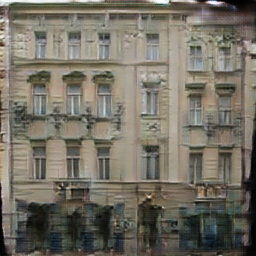

In [ ]:
result_img = cv2.imread(results_directory + '100_fake_B.png')
cv2_imshow(result_img)

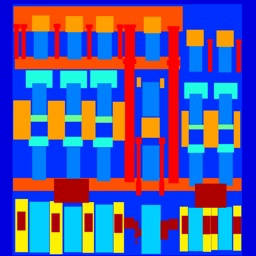

In [ ]:
result_img = cv2.imread(results_directory + '100_real_A.png')
cv2_imshow(result_img)

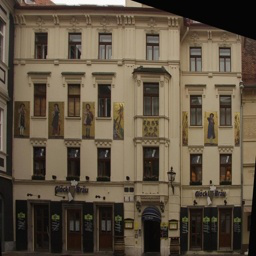

In [ ]:
result_img = cv2.imread(results_directory + '100_real_B.png')
cv2_imshow(result_img)

# Drawing to photo


## Downloading the model



In [ ]:
model_name = 'edges2shoes'
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
!mkdir -p {model_directory}

In [ ]:
url_model = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
!wget -N {url_model}

--2023-04-12 12:32:16--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘edges2shoes.pth’

edges2shoes.pth     100%[===================>] 207.62M  54.3MB/s    in 7.0s    

2023-04-12 12:32:24 (29.7 MB/s) - ‘edges2shoes.pth’ saved [217704688/217704688]



In [ ]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

## Loading the test images

In [ ]:
!mkdir -p images/test/

## Visualizing the results

Parameters:

* ` --dataset_mode single` - sets the mode to `single` which means we will send single images

* `--model test` - to send test images

* `--netG unet_256` - the neural network of the generator

* `--norm batch` - this is the default value

* `--direction` - not needed since it is a single image

In [ ]:
!python test.py --dataroot ./images --name {model_name}_pretrained --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./images                      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

## Multiple images

In [ ]:
results_directory = './results/{}_pretrained/test_latest/images/'.format(model_name)

In [ ]:
def show_results(img_name, directory):
  input_img = cv2.imread(directory + img_name + '_real.png')
  result_img = cv2.imread(directory + img_name + '_fake.png')
  imgs = [input_img, result_img]
  title = ['Input image', 'Photo (output)']
  for i in range(len(imgs)):
    plt.subplot(1,2,i + 1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()

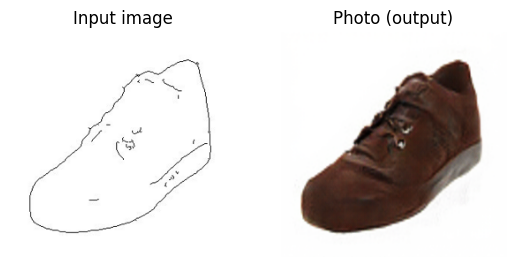

In [ ]:
img = 'shoe01'
show_results(img, results_directory)

In [ ]:
imgs_dir = 'images/test'
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(imgs_dir) if f.endswith(".jpg")]
list_imgs

['shoe01_v3',
 'shoe04',
 'shoe03',
 'shoe05',
 'shoe02',
 'shoe01_v2',
 'shoe02_v2',
 'shoe02_v3',
 'shoe01']


Result for image shoe01_v3


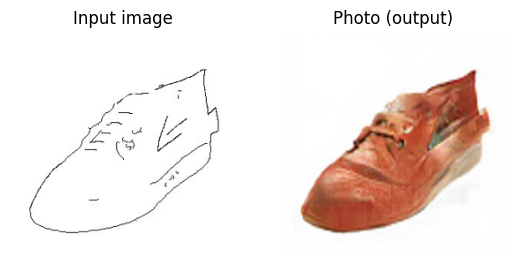


Result for image shoe04


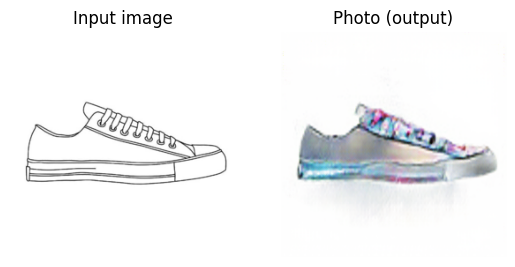


Result for image shoe03


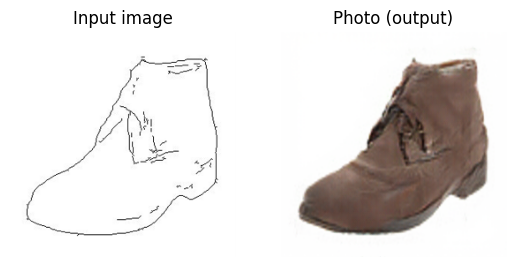


Result for image shoe05


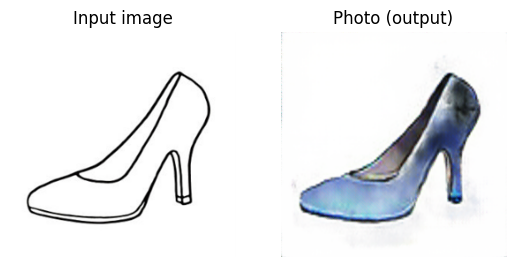


Result for image shoe02


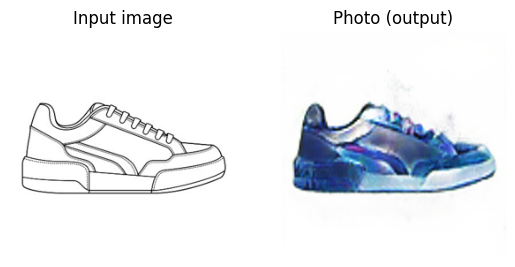


Result for image shoe01_v2


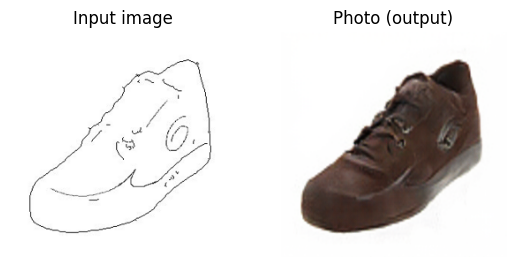


Result for image shoe02_v2


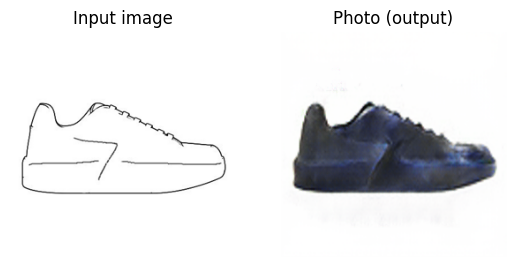


Result for image shoe02_v3


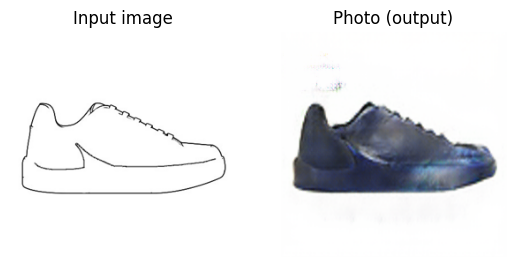


Result for image shoe01


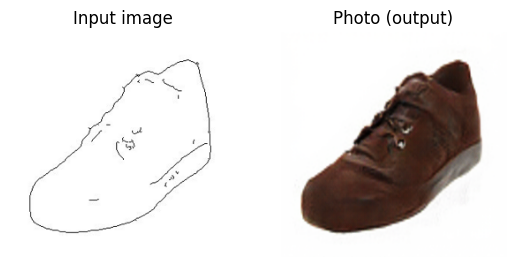

In [ ]:
for img in list_imgs:
  print('\nResult for image {}'.format(img))
  show_results(img, results_directory)

# Day to Night

## Loading the model

In [ ]:
model_name = 'day2night'
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
!mkdir -p {model_directory}

In [ ]:
url_model = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
!wget -N {url_model}

--2023-04-12 12:59:05--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘day2night.pth’

day2night.pth       100%[===================>] 207.62M  57.6MB/s    in 4.1s    

2023-04-12 12:59:09 (50.7 MB/s) - ‘day2night.pth’ saved [217710797/217710797]



In [ ]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

## Visualizing the results

In [ ]:
!python test.py --dataroot /content/test --name {model_name}_pretrained --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/test                 	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            